## Parrondo's Paradox: Two Ugly Parents can Have Beautiful Children

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from random import random
import seaborn as sns
from tqdm.notebook import tqdm
from time import sleep
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,8)})


### Global Constants

In [2]:
epsilon = 0.005
steps = 3
n_trials = 500
number_of_rounds = 100

# Game A

Coin Flipping Game
* flip the coin for 100 times
* the coin is biased, the probability that you win is slightly less than 1/2
* if tail up, you win a dollar, or fortune + 1
* if head up, you lose a dollar, or fortune - 1

In [3]:
def GameA(fortune):
    net = 1 if random() < 0.5-epsilon else -1
    fortune += net
    return fortune

Helper functions

In [4]:

def iterate_game(game, numIter=n_trials, numFlip=number_of_rounds):
    npOutcome = np.zeros((numIter, numFlip))
    for i in range(numIter):
        outcome = []
        tmp_fortune = 0
        for j in range(numFlip):
            tmp_fortune = game(tmp_fortune)
            outcome.append(tmp_fortune)
        npOutcome[i, :] = outcome
    return np.mean(npOutcome, 0)

In [5]:
def draw_game_plot(results):
    fig = plt.figure()
    plt.plot(results)
    plt.xlabel('Step')
    plt.ylabel('Payoff')
    fig.show()

/tmp/ipykernel_80283/2768453231.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


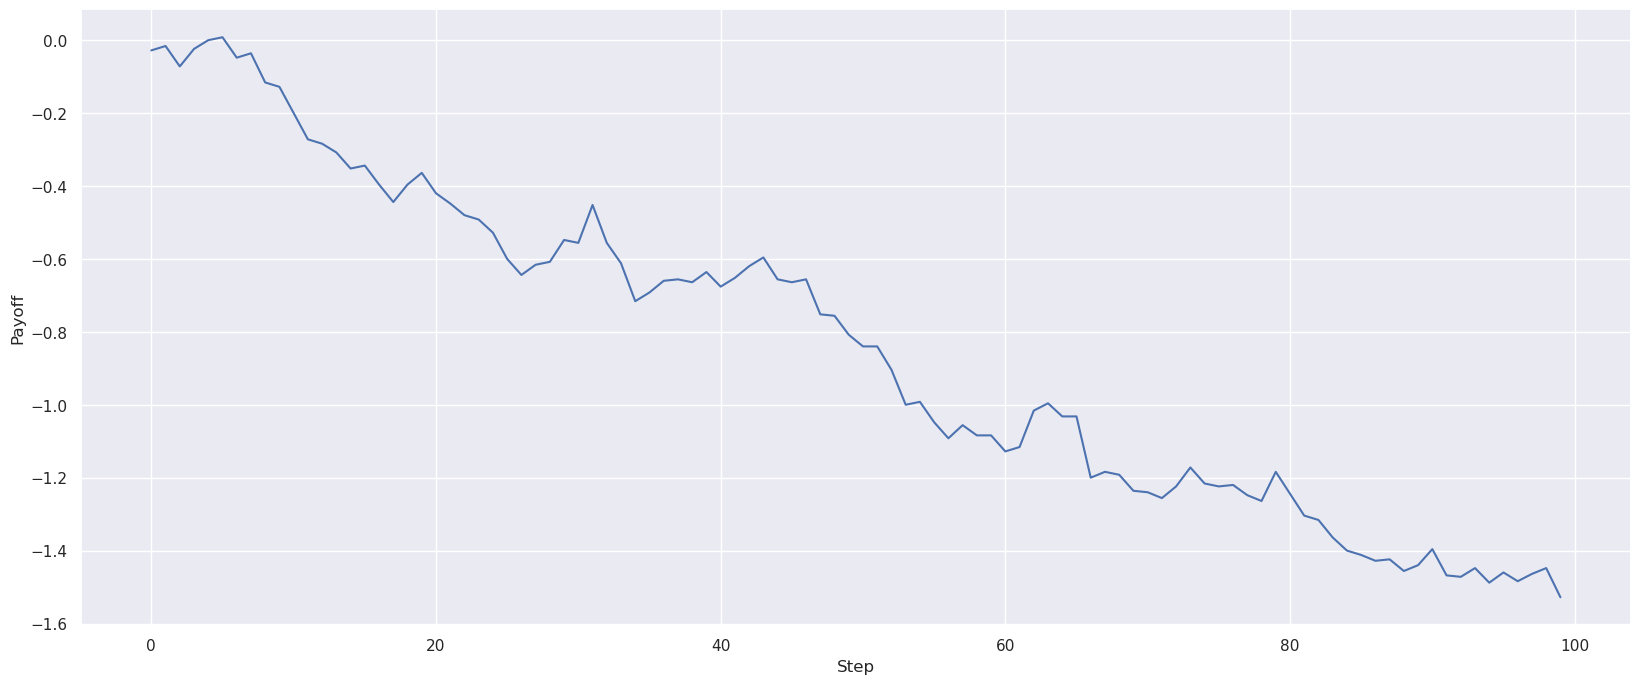

In [6]:
results = iterate_game(GameA)
draw_game_plot(results)

# Game B

Another game:
* if your fortune is a mutiple of 3, the probability of you winning a dollar is slightly less than 1/10. Otherwise, you lose a dollar.
* if your fortune is **not** a multiple of 3, the probability of you winning a dollar is slightly less than 3/4. Otherwise, you lose a dollar.

Let's run 100 trials of Game B, each trial we play 100 rounds. 

Some constants for Game B:

In [7]:
def GameB(fortune):
    r = random()
    net = 0
    if fortune % steps == 0:
        net = 1 if r < (0.1-epsilon) else -1
    else:
        net = 1 if r < (0.75-epsilon) else -1
    fortune += net
    return fortune


/tmp/ipykernel_80283/2768453231.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


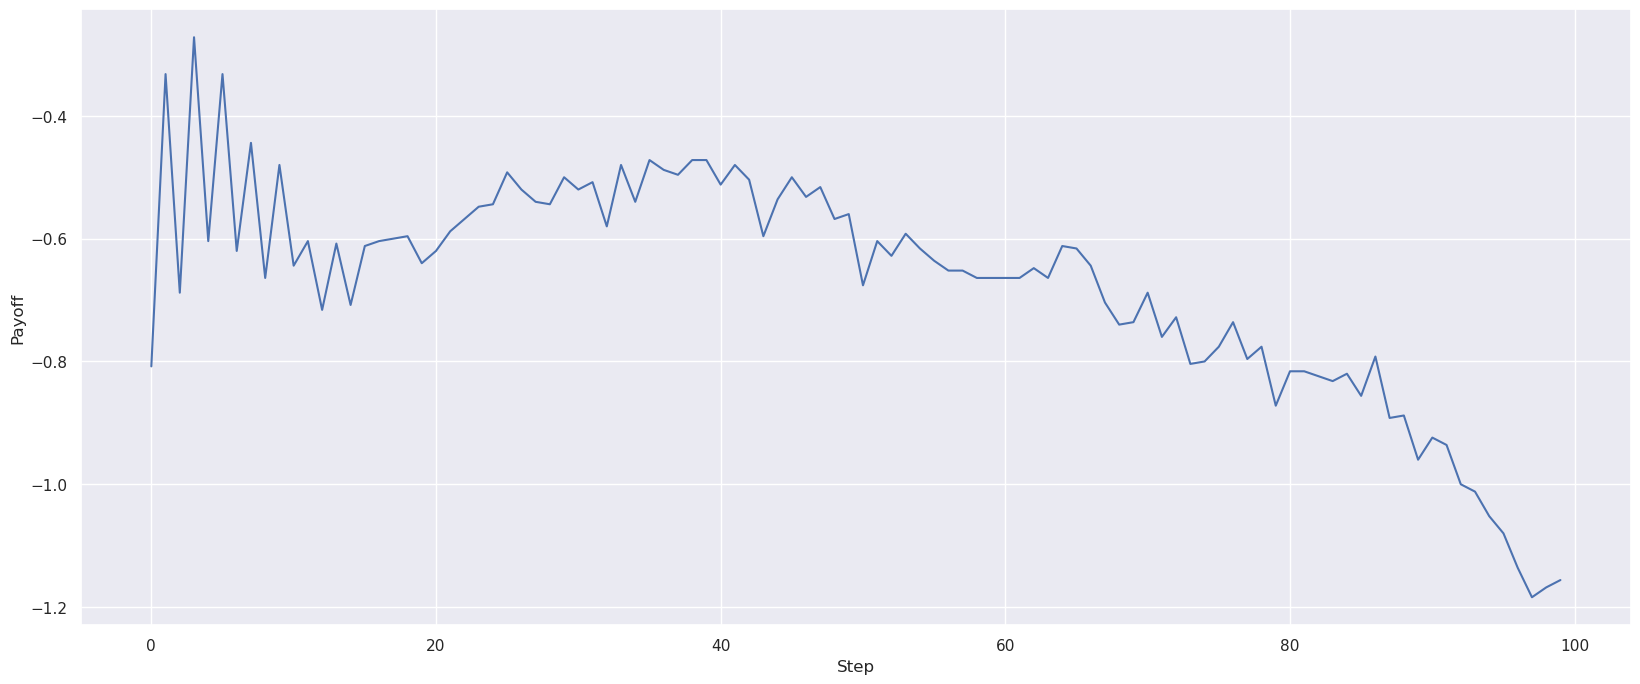

In [8]:
results = iterate_game(GameB)
draw_game_plot(results)

# Game C

- Game C is a mixture of game A and game B.
- Half of the times, game A is played. Other half of the times, game B is played.
- other parameters are the same as before. We play ___ trials, each trial consists of 100 rounds. 

In [9]:
def GameC(fortune):
    if random() < 0.5:
        fortune = GameA(fortune)
    else:
        fortune = GameB(fortune)
    return fortune


/tmp/ipykernel_80283/2768453231.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


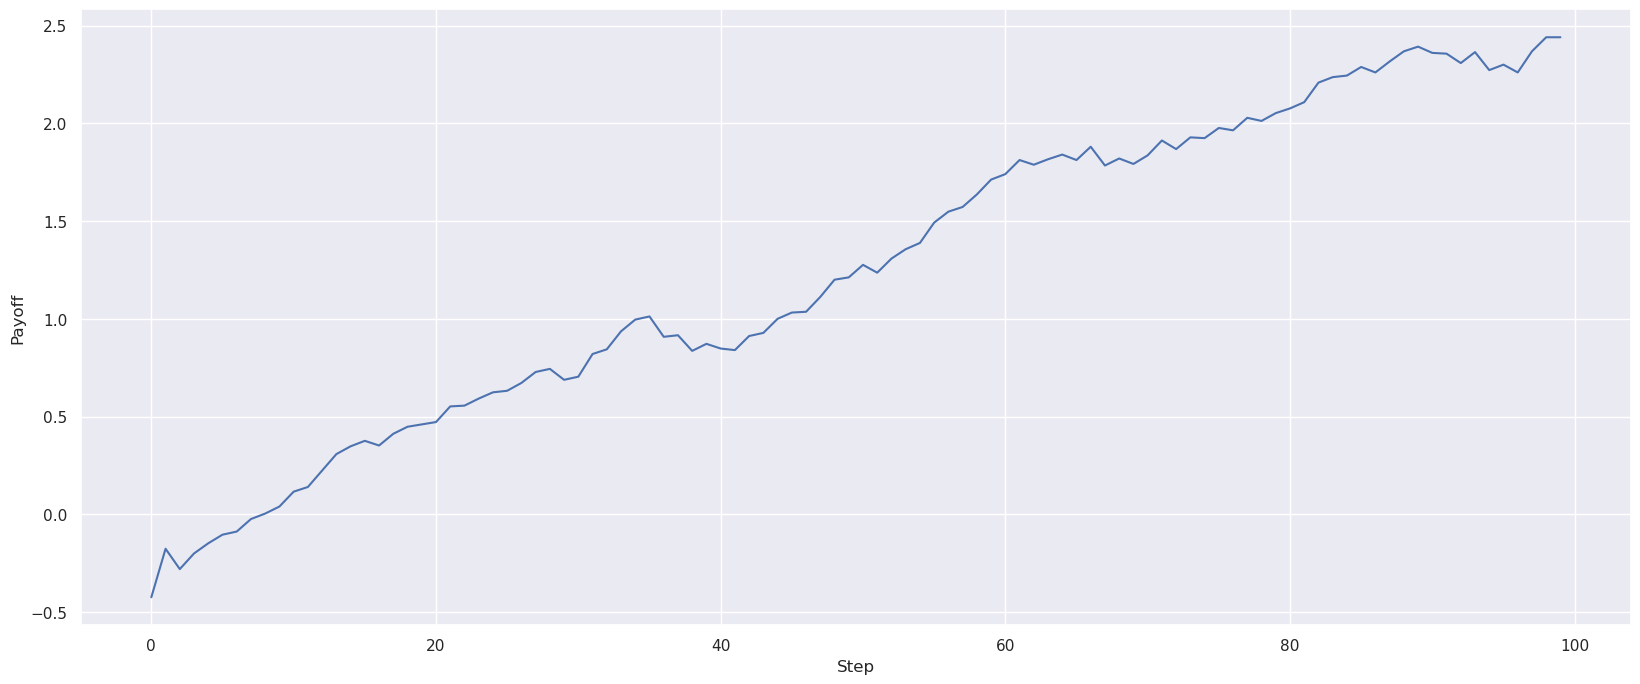

In [10]:
results = iterate_game(GameC)
draw_game_plot(results)

### Other game scenarios

In [11]:
def GameAABB(fortune, j):
    if j % 4 < 2:
        fortune = GameA(fortune)
    else:
        fortune = GameB(fortune)
    return fortune

def GameABB(fortune, j):
    if j % 3 < 1:
        fortune = GameA(fortune)
    else:
        fortune = GameB(fortune)
    return fortune

def GameABAB(fortune, j):
    if j % 2 == 0:
        fortune = GameA(fortune)
    else:
        fortune = GameB(fortune)
    return fortune

In [12]:
def iterate_pattern_game(game, numIter=n_trials, numFlip=number_of_rounds):
    npOutcome = np.zeros((numIter, numFlip))
    for i in range(numIter):
        outcome = []
        tmp_fortune = 0
        for j in range(numFlip):
            tmp_fortune = game(tmp_fortune, j)
            outcome.append(tmp_fortune)
        npOutcome[i, :] = outcome
    return np.mean(npOutcome, 0)

/tmp/ipykernel_80283/2768453231.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


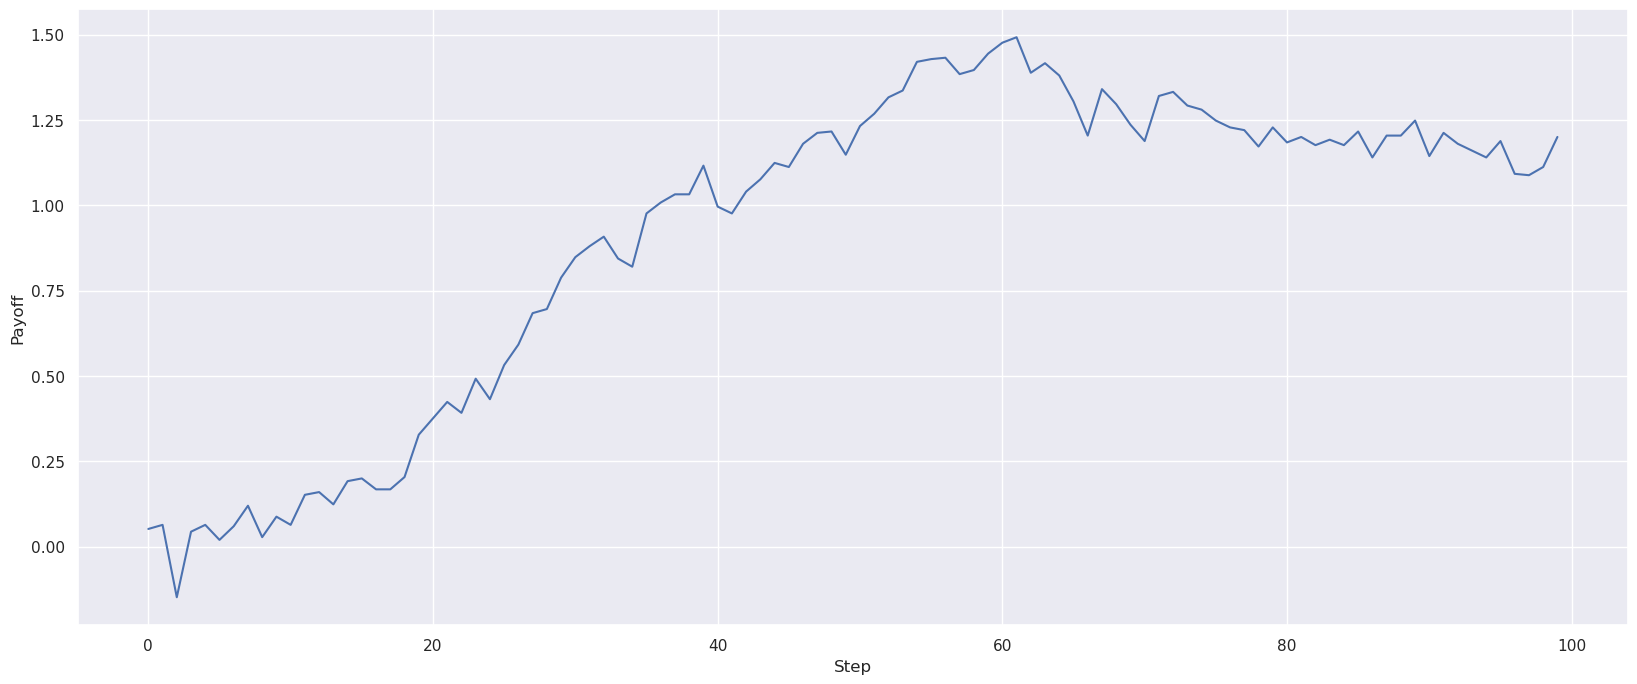

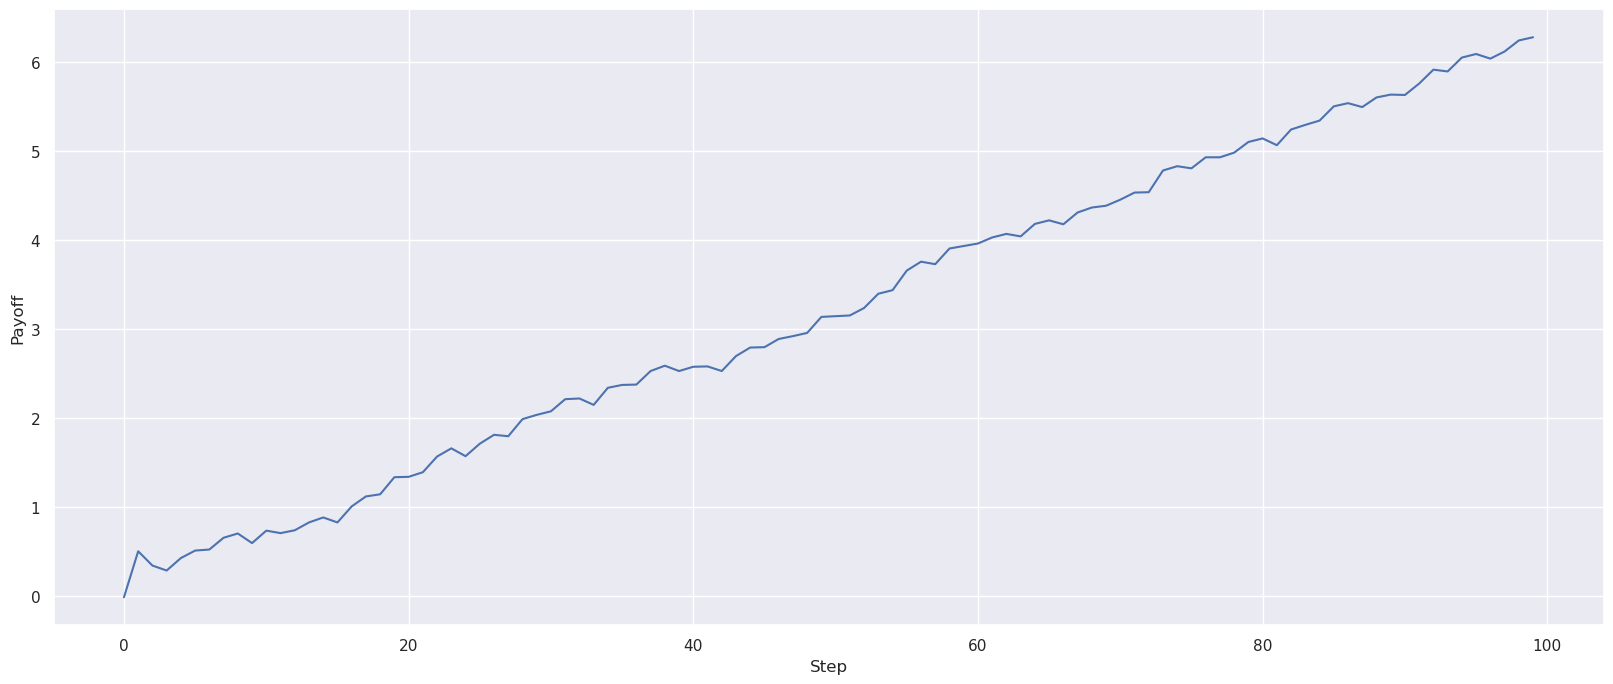

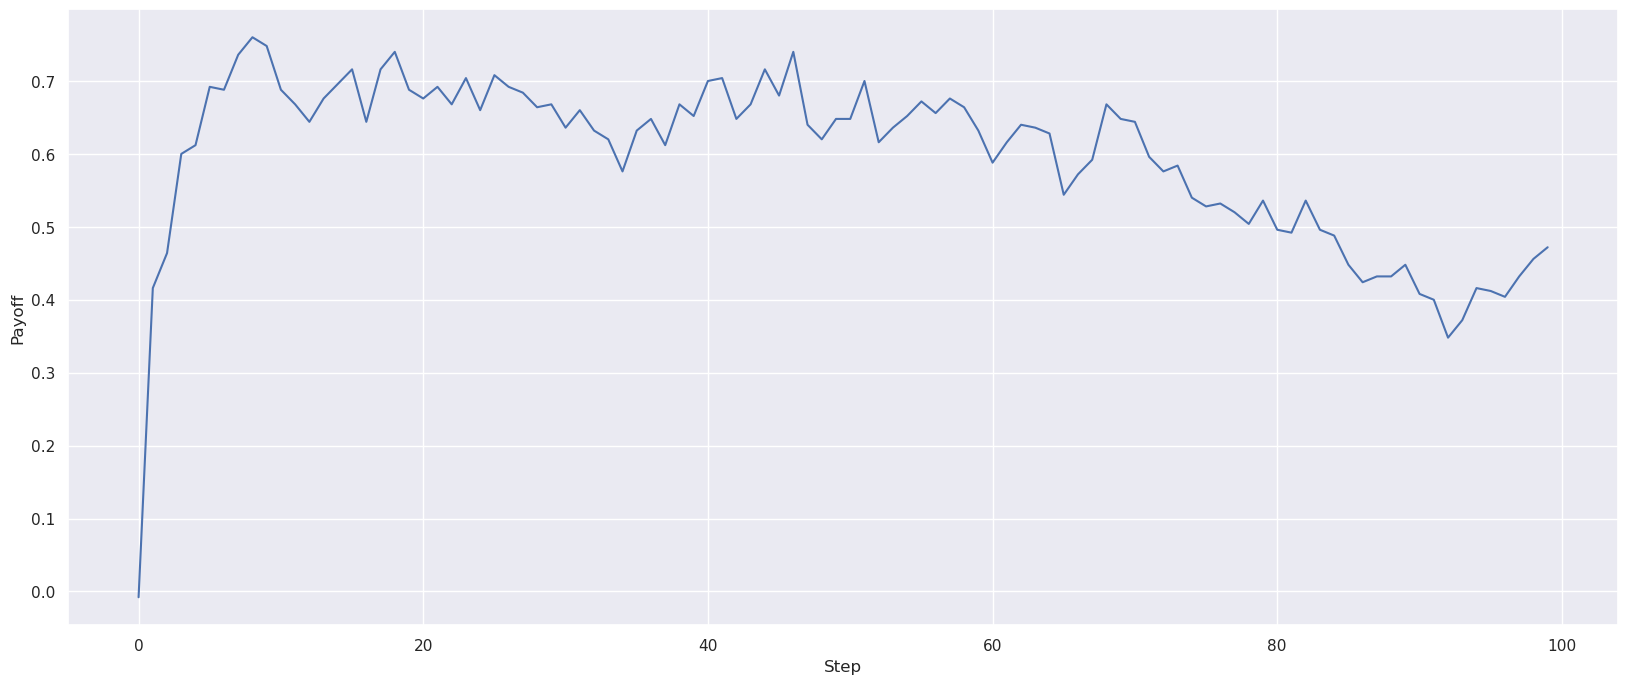

In [13]:
draw_game_plot(iterate_pattern_game(GameAABB))
draw_game_plot(iterate_pattern_game(GameABB))
draw_game_plot(iterate_pattern_game(GameABAB))